In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,821 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


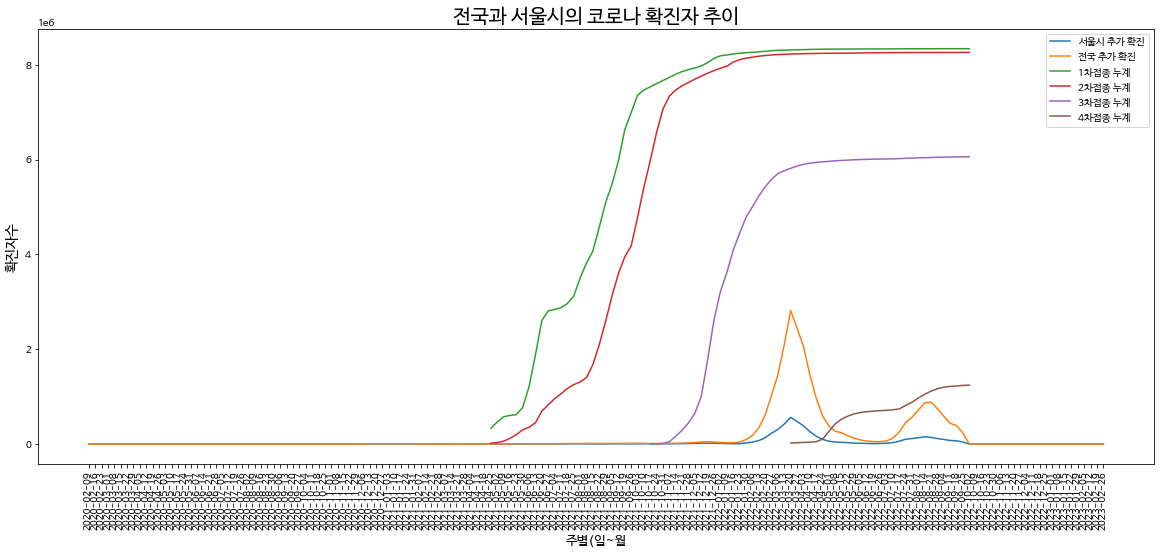

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np                                                                               #라이브러리 불러오기

df_raw = pd.read_csv('/content/서울시 코로나19 확진자 발생동향.csv', encoding = 'cp949')                 #한글로 된 csv파일을 불러올떄 cp949


# print(df_raw.shape, df_raw.columns)
# print(df_raw.shape, df_raw.columns)

df = df_raw[['서울시 기준일','서울시 확진자','서울시 추가 확진','전국 확진','전국 추가 확진']]    #원본 데이터 에서 필요한 데이터만 가져오기
df['서울시 기준일'] = pd.to_datetime(df['서울시 기준일'])                                         #df['서울시 기준일_dt'] = pd.to_datetime(df['서울시 기준일'])
df_pivot = df.pivot_table(index='서울시 기준일',values=['전국 추가 확진','서울시 추가 확진'])     #datafarme 형식을 pivottable로 변환
weekly_cv = df_pivot.resample('W').sum()                                                          #주단위로 데이터 압축하기


vac_raw = pd.read_csv('/content/서울시 코로나19 백신 예방접종 현황.csv', encoding = 'cp949')
vac_raw.rename(columns = {'접종일' :'서울시 기준일'}, inplace = True)
vac = vac_raw[vac_raw.columns[::3]]
vac['서울시 기준일'] = pd.to_datetime(vac['서울시 기준일'])
vac_pivot = vac.pivot_table(index = '서울시 기준일', values = ['서울시 기준일', '1차접종 누계', '2차접종 누계', '3차접종 누계', '4차접종 누계'])
weekly_vac = vac_pivot.resample('W').mean()



plt.rc('font', family='NanumBarunGothic')                                                             #한글 안깨지게..
plt.rcParams['axes.unicode_minus'] = False

df_name = weekly_cv.columns                                                                       #피벗테이블의 컬럼을 리스트로 불러오기

plt.figure(figsize = (20, 8))                                                                     #가로 길이, 세로 길이
for df in df_name:                                    
    plt.plot(weekly_cv[df], label = df)                                                           #데이터 지정
    plt.legend()                                                                                  #범례 표시
    plt.title('전국과 서울시의 코로나 확진자 추이', fontsize = 20)                                #그래프 제목
    plt.xlabel('주별(일~월', fontsize = 13)                                                       #x축 제목
    plt.ylabel('확진자수', fontsize = 14)                                                         #y축 제목
    plt.xticks(weekly_cv.index.to_list() , rotation=90)                                           #간격 표시

    vac_name = weekly_vac.columns
for vac in vac_name:                                    
    plt.plot(weekly_vac[vac], label = vac)                                                          
    plt.legend()                                                                                                               
    plt.xlabel('주별(일~월', fontsize = 13)                                                       
    plt.ylabel('확진자수', fontsize = 14)                                                         
    plt.xticks(weekly_cv.index.to_list() , rotation=90)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


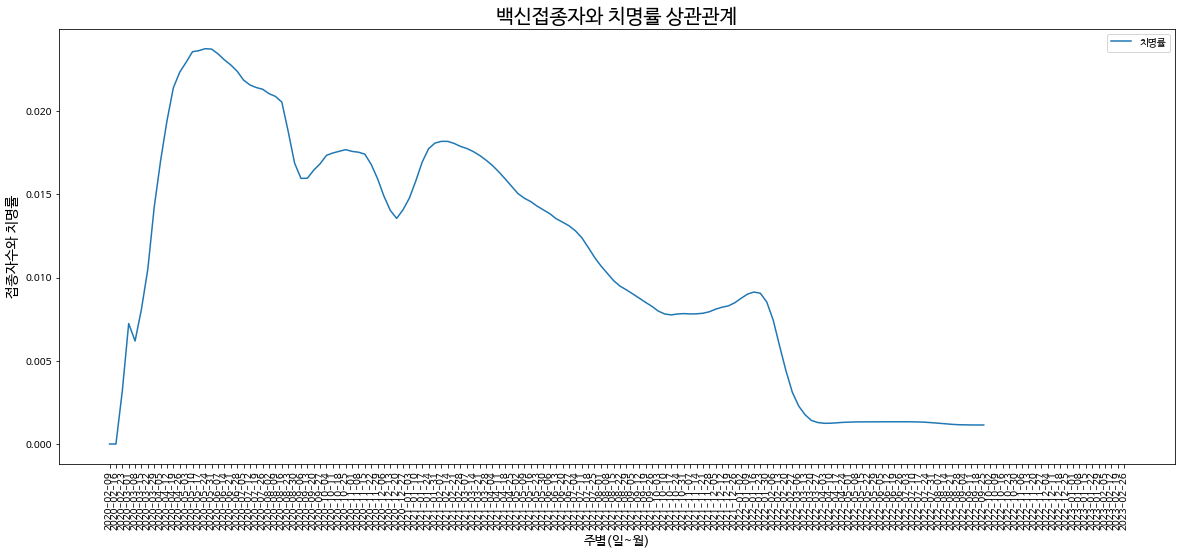

In [5]:
death_df = df_raw[['서울시 기준일','전국 사망','전국 당일 사망자']]
death_df['서울시 기준일'] = pd.to_datetime(death_df['서울시 기준일'])
death_pivot = death_df.pivot_table(index ='서울시 기준일', values = ['전국 당일 사망자'])
weekly_death = death_pivot.resample('W').sum()

deathsum_pivot = death_df.pivot_table(index ='서울시 기준일', values = ['전국 사망'])
weeklysum_death = deathsum_pivot.resample('W').mean()

plt.rc('font', family='NanumBarunGothic')                                                             
plt.rcParams['axes.unicode_minus'] = False

mortality_df = df_raw['전국 사망']/df_raw['전국 확진']
time_df = df_raw['서울시 기준일']
mortality = pd.concat([time_df, mortality_df],axis=1)
mortality.columns = ['서울시 기준일', '치명률']

mortality['서울시 기준일'] = pd.to_datetime(mortality['서울시 기준일'])
mortality_pivot = mortality.pivot_table(index ='서울시 기준일', values = ['치명률'])
weekly_mortality = mortality_pivot.resample('W').mean()

deathsum_pivot = death_df.pivot_table(index ='서울시 기준일', values = ['전국 사망'])
weeklysum_death = deathsum_pivot.resample('W').mean()

                                                            
death_name = weekly_death.columns
vac_name = weekly_vac.columns
deathsum_name = weeklysum_death.columns
mortality_name = weekly_mortality.columns

plt.figure(figsize = (20, 8))                                                                 
for vac in vac_name:                                    
    # plt.plot(weekly_vac[vac]/300000000, label = vac)                          
    plt.title('백신접종자와 치명률 상관관계', fontsize = 20)                                    
    plt.legend()                                                                                                               
    plt.xlabel('주별(일~월)', fontsize = 13)                                                       
    plt.ylabel('접종자수와 치명률', fontsize = 14)                                                         
    plt.xticks(weekly_cv.index.to_list() , rotation=90)     

for mor in mortality_name:
    plt.plot(weekly_mortality[mor], label = mor)                                                          
    plt.legend()                                                                                                                                                                     
    plt.xticks(weekly_cv.index.to_list() , rotation=90)

# for death in death_name:
#     plt.plot(weekly_death[death], label = death)                                                          
#     plt.legend()                                      
#     plt.ylabel('사망자수', fontsize = 14)                                                                                                                                     
#     plt.xticks(weekly_cv.index.to_list() , rotation=90)  

# for death in deathsum_name:
#     plt.plot(weeklysum_death[death]/10, label = death)                                                          
#     plt.legend()                                      
#     plt.ylabel('사망자수', fontsize = 14)                                                                                                                                     
#     plt.xticks(weekly_cv.index.to_list() , rotation=90)  

In [ ]:
mortality_df = df_raw['전국 사망']/df_raw['전국 확진']
time_df = df_raw['서울시 기준일']
mortality = pd.concat([time_df, mortality_df],axis=1)
mortality.columns = ['서울시 기준일', '치명률']
mortality.columns

Index(['서울시 기준일', '치명률'], dtype='object')